# **CHAPITRE 3 - Introduction à la régression : la régression linéaire 📈**

## **I - Une petite explication 📜**

### **1 - Qu'est-ce que la regression linéaire ?**

La **régression linéaire** est l’un des outils les plus basiques en Machine Learning. Comme son nom l'indique, elle a pour but de mettre en relation un ensemble de caractéristiques $x$ avec sa cible $y$ (*où $y$ est un nombre réel*), et cela grâce à un modèle mathématique linéaire.

> *💡 Remarque : on parle de variable(s) explicative(s) pour $x$*

**Tâchons d'illustrer ça avec un exemple :**
> Vous êtes un **agent immobilier** 🏠, et vous avez plusieurs informations concernant les appartements sous votre charge : *leur surface, leur positionnement géographique, leur niveau d'isolation [...]*. Toutes ces données ont permis de définir **leur prix 💰**. Cependant, il s'agit d'un certain travail d'analyse que vous pourriez chercher à simplifier dans le futur. En effet, grâce aux appartements déjà estimés en fonction de leurs caractéristiques, il est possible de créer un modèle de **regression linéaire** pour définir le prix d'un nouvel appartement. 

**Ici :** *"leur surface, leur positionnement géographique, leur niveau d'isolation [...]"* sont les variables explicatives $x$ et la cible $y$ est *"le prix"* qui sera obtenu .

**1.** Il va vous falloir créer **un modèle mathématique** fiable, basées sur les données déjà recueillies vis à vis des autres appartements. Et pour cela, il vous faut **sélectionner** le type de modèle approprié :
   * **une droite affine,**
   * **un polynome,**
   * **une exponentielle,**
   * [...]

Le modèle choisi doit permettre de faire le lien entre les caractéristiques et le prix de l'appartement. On parle de **régression simple** lorsque le prix n'est lié qu'à **une seule variable** explicative, par exemple la surface. Dans votre cas, il faudra se baser sur plusieurs variables, imaginez bien qu'à surface égale, un appartement situé proche du centre ville et des services sera plus cher qu'un bien situé en périphérie. Vous aurez donc besoin de **plusieurs variables explcatives** pour établir notre modèle : on parle alors de **régression multiple**. Il s'agit d'une technique assez courante puisque vous serez souvent confrontés à des phénomènes dont les paramètres sont liés entre eux.

**2.** Une fois que vous avez déterminé votre modèle, il va falloir **optimiser ses paramètres** (modifier les coefficiants devant le polynome, la droite[...]) en fonction des données que vous avez pour qu'il s'adapte de manière à ce que sa courbe de prédiction des prix soit la plus proche possible des prix déjà déterminés des appartements. C'est la phase d'**entrainement** du modèle.

**3.** Maintenant que vous avez un modèle avec des paramètres optimisés, si vous rentrez dans les paramètres d'un nouvel appartement dans le modèle, il devrait être en capacité de **prédire de manière correcte son prix 🤑** : c'est gagné !

> *💡 Remarque : Même si la régréssion linéaire a l'avantage d'être plutôt simple, et est très robuste à l'intégration de nouvelles données, cette méthode se trouve limitée de par sa capacité à ne modéliser que des droites.*

### **2 - Mathématiquement, à quoi ressemble un modèle linéaire ressemble ?**

Posons préalablement $x = (x_1, x_2, \dotsc, x_D)$, le vecteur de $D$ composantes, dont chacune d'entre elles correspond à une caractéristique.

Pour résoudre une tâche de régression, nous modélisons la relation entre nos couples $(x, y)$ par une droite $\hat y$ telle que :

$$
\hat y = \sum_{i=1}^D a_i x_i + b
$$

Le modèle effectue une **combinaison linéaire** de toutes les caractéristiques $x_{i}$ pour produire une valeur finale $\hat y$ représentant la valeur prédite.
L'apprentissage de ce modèle se fait en déterminant les $D$ valeurs du vecteur $a = (a_1, a_2, \dotsc, a_D)$ et celle du biais $b$.

> *💡 Remarque : On dit que $a$ et $b$ sont les **paramètres** du modèle.*

**Introduisons notre approche avec un peu de code :**

Pour mieux se rendre compte de ce que font les paramètres $a$ et $b$,
on peut afficher le tracé de quelques droites dans le cas où $x$ (et donc $a$) n'a qu'une dimension ($N=1$). On aura donc une droite affine du type.

$$
y = ax + b
$$

Visuellement, $a$ est la **pente** (ou coefficiant directeur) de la courbe et $b$ **l'ordonnée à l'origine** (à $x = 0$).

In [1]:
import numpy as np
import plotly.graph_objects as go

def f(x: np.ndarray, a: float, b: float) -> np.ndarray:
    return a * x + b

x = np.arange(10)
a_list = [0, 1, 2]
b_list = [1, 3, 0]

fig = go.Figure()

for a, b in zip(a_list, b_list) :
    y = f(x, a, b)
    fig.add_scatter(x=x, y=y, name=f"a = {a}, b = {b}", mode="lines")

fig.update_layout(  title=f"Plusieurs droites selon des valeurs a et b différentes",
                    xaxis_title="x",
                    yaxis_title="ŷ = ax + b",
                    legend_title="Valeur des paramètres",)
fig.show()

## Exemple simple
Pour illustrer cette méthode, nous allons utiliser un dataset fictif et entraîner le modèle à l'aide de `scikit-learn`.
*Scikit-learn* est une librairie qui implémente beaucoup d'algorithmes de Machine Learning et dont la manipulation est simplissime.

On génère notre dataset à l'aide d'une relation linéaire de la même forme que celle de notre modèle, en ajoutant un peu de bruit pour
être un peu plus réaliste.

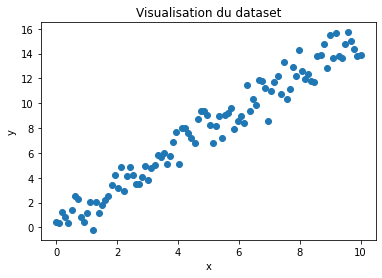

In [2]:
x = np.linspace(0, 10, 100)
a = 1.5
b = 0.3
rng = np.random.default_rng(0)
y = a * x + b + rng.standard_normal(len(x))

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualisation du dataset')
plt.show()

Paramètres appris :
a = 1.515
b = 0.308


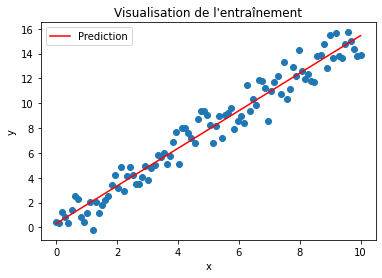

In [3]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

print('Paramètres appris :')
print(f'a = {model.coef_[0]:.3f}')
print(f'b = {model.intercept_:.3f}')

y_pred = model.predict(X)

plt.scatter(x, y)
plt.plot(x, y_pred, 'red', label='Prediction')
plt.title("Visualisation de l'entraînement")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

On peut voir que le modèle a appris des paramètres très proches des coefficients initiaux utilisés pour générer le dataset.

Bien entendu, il faut bien comprendre que dans un cas réel d'utilisation, nous n'avons pas la connaissance de la vraie valeur de $a$ et $b$.
Pire que ça, on ne sait même pas si la relation entre $x$ et $y$ sous-jacente est vraiment linéaire ou non !
Notre modèle permet d'obtenir une image simplifiée du phénomène qui relie $x$ et $y$.

## Évaluation d'une régression
Dans notre exemple simple précédent, nous avons pu visuellement nous rendre compte de la performance de notre modèle.
Cependant ce n'est pas tout le temps facile d'obtenir une telle visualisation, et puis c'est plus pratique d'avoir un
score un peu plus objectif afin de comparer plusieurs méthodes sur une même tâche.

Il existe donc des métriques permettant d'évaluer nos modèles afin de mieux juger leur performance.

### Mean Squared Error (MSE)
La MSE mesure l'écart moyen entre la prédiction d'un modèle et la valeur réelle attendue.
Des prédictions parfaites produisent un MSE valant $0$.
Plus un modèle est bon et plus il aura un score proche de $0$.

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat y_i)^2
$$

Ici :
* Nous avons $N$ différents exemples dans notre dataset.
* $y_i$ est la valeur réelle pour l'exemple numéro $i$.
* $\hat y_i$ est la valeur prédite par le modèle pour cet exemple $i$.

La MSE est une fonction pratique en optimisation car elle est convexe (minimum unique) et dérivable partout.
Pour cette raison, elle est souvent utilisée comme objectif à minimiser en plus de simple mesure de performance.

Le calcul de la MSE peut se faire ainsi dans notre exemple précédent :

In [4]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print(f'MSE = {mse:.3f}')

MSE = 0.924


### Coefficient de détermination $R^2$
Le $R^2$ mesure la capacité du modèle à prédire les variations de $y$.
On compare le modèle à un modèle basique qui prédirait simplement la moyenne $\bar y = \frac{1}{N} \sum_{i=1}^N y$.

$$
R^2 = 1 - \frac{ \sum_{i=1}^N (y_i - \hat y_i)^2 }{ \sum_{i=1}^N (y_i - \bar y)^2 }
$$

On peut analyser le calcul ainsi :
* Le numérateur représente la MSE de notre modèle.
* Le dénominateur représente la MSE d'un modèle qui prédirait tout le temps la valeur moyenne $\bar y$.

Ainsi, plusieurs cas se distinguent :
* $R^2 = 1$ : le modèle effectue des prédictions parfaites (il a un MSE = 0).
* $R^2 = 0$ : le modèle a la même MSE qu'un modèle prédisant la valeur moyenne $\bar y$.
* $R^2 > 0$ : le modèle est meilleur qu'un modèle prédisant la valeur moyenne $\bar y$.
* $R^2 < 0$ : le modèle est moins bon qu'un modèle prédisant la valeur moyenne $\bar y$.

Cette mesure synthétise la pertinence de notre modèle en une seule valeur.
Pour notre exemple précédent, on peut l'obtenir ainsi :

In [5]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(f'R² = {r2:.3f}')

R² = 0.955


## La régression linéaire c’est sympa, mais comment ça marche ?
Chaque méthode de régression a sa propre façon d'apprendre à partir d'un dataset.
Ce chapitre se concentre sur l'exemple de la régression linéaire donc nous allons regarder de plus près comment
ce modèle fonctionne plus précisémment.

Nous avons déjà vu la manière dont la régression linéaire effectue ses prédictions une fois que les paramètres $a$ et $b$ sont appris.
Nous allons maintenant nous attaquer à l’apprentissage ces paramètres !

### Principe général
Comme on l'a vu, on peut mesurer la performance d'un modèle par sa MSE évaluée sur le dataset.
Pour améliorer notre modèle, on cherche à minimiser la MSE en trouvant les bonnes valeurs de notre vecteur $a$ et de notre réel $b$.

$$
a^*, b^* = \arg \min_{a, b} \frac{1}{N} \sum_{i=1}^N (y_i - a^T x + b)^2
$$

On utilise la MSE comme fonction de perte car elle a de bonnes propriétés : elle est convexe et dérivable partout.

*En réalité, d'autres fonctions de perte sont envisageables, et change légèrement la façon dont on considère le problème.*

Pour calculer le minimum de cette fonction, on peut utiliser diverses méthodes basées sur le gradient ou la hessienne par rapport à $a$ et $b$.
On peut aussi directement estimer le minimum à l'aide d'une expression analytique, ce que nous allons voir.

### (\*\*) Solution analytique
On démontre ici la solution analytique de la régression linéaire.

On part de la forme générale où nos données sont un ensemble de paires $(x, y)$ où $x = (x_1, x_2, \dotsc, x_D)$ est un vecteur contenant $D$ features
et $y$ est un réel.
Sans manque de généralité, on simplifie le calcul de $b$ en l'intégrant dans celui de $a$.
Pour cela on remarque qu'il suffit d'ajouter une feature constante valant toujours $1$ à $x$, qui devient alors un vecteur à $D+1$ dimensions.
La valeur de $a_{D+1}$ représente alors la valeur de $b$.
Pour ne pas s'embêter, on garde un vecteur $x \in \mathbb{R}^D$ à $D$ dimensions afin d'alléger les notations.

On pose :
* $X \in \mathbb{R}^{N \times D}$ : la matrice contenant les features $x$ de nos données.
* $y \in \mathbb{R}^{N \times 1}$ : vecteur contenant toutes les vraies valeurs à prédire.
* $A \in \mathbb{R}^{D \times 1}$ : vecteur de paramètre à apprendre.

L'objectif peut être réécris ainsi :

$$
\arg \min_{A} \frac{1}{N} (y - \hat y)^T (y - \hat y) = \arg \min_{A} \frac{1}{N} (y - X A)^T (y - X A)
$$

Pour trouver l'expression de $A$ qui minimise cette MSE, on calcule son gradient par rapport à $A$ et on fixe celui-ci à 0.

$$\begin{align}
\nabla [ \frac{1}{N} (y - X A)^T (y - X A) ] & = -\frac{2}{N} X^T (y - X A) \\
& = -\frac{2}{N} X^T y + \frac{2}{N} X^T X A \\
& = 0
\end{align}$$

On déduit alors facilement l'expression de $A$ :

$$
A = (X^T X)^{-1} X^T y
$$

L'inverse de $X^T X$ doit exister pour que cette formule soit valable.
En pratique, le bruit dans $X$ lui permet d'éviter le cas difficile où $X^T X$ n'est pas inversible,
mais si c'est quand même le cas il existe des [astuces](https://www.cs.cmu.edu/~aarti/Class/10315_Fall19/lecs/Lecture16.pdf) pour contourner le problème.

Notez que cette démonstration est surtout utile pour le côté théorique du résultat.
En pratique d'autres méthodes existent et sont numériquement plus stable ce qui donnera de meilleurs résultats.

## Exemple concret
On va maintenant utiliser le dataset [*California Housing*](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) comme exemple plus réaliste que le précédent.
Ce dataset contient plusieurs caractéristiques sur des maisons de Californie ainsi que leur prix de vente.
Le but est de faire une régression linéaire capable de prédire le prix des maisons à partir des autres caractéristiques.

On calcule l'inverse d'une matrice à l'aide de `numpy`.

In [6]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
print('Caractéristiques :', *dataset['feature_names'])

X, y = dataset['data'], dataset['target']
# Ajoute la feature constante associée à b (voir partie "Solution analytique")
b_feature = np.ones((X.shape[0], 1))
X = np.concatenate([X, b_feature], axis=1)

A = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ A

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print('\nPerformances :')
print(f'MSE = {mse:.3f}')
print(f'R² = {r2:.3f}')

Caractéristiques : MedInc HouseAge AveRooms AveBedrms Population AveOccup Latitude Longitude

Performances :
MSE = 0.524
R² = 0.606


Une fois le dataset chargé, le reste ne prends que quelques lignes en Python !

Une fois que l'on a calculé $A$, on peut facilement faire de nouvelles prédictions à l'aide de features collectées sur une maison
dont vous ne savez pas le prix.

## Avantages de la régression linéaire
Pour le moment, nous n'avons vu que la régression linéaire comme modèle de régression.
Lorsque vous en connaîtrez plusieurs, il sera utile de connaître les différents avantages de chaque méthode afin de mieux
apréhender les performances de vos modèles et de mieux les comparer.

### Simplicité
Le modèle linéaire est simple. Cela peut lui faire défaut lorsque la relation $(x, y)$ est trop complexe pour être modélisée par une combinaison linéaire.
Mais lorsque la linéairité s'applique, au moins un peu, alors c'est une force.
[Les explications simples](https://fr.wikipedia.org/wiki/Rasoir_d%27Ockham) sont souvent celles qui se rapprochent le plus de la vérité.
Nous verrons dans les chapitres suivants comment la simplicité permet de mieux généraliser à de nouveaux cas.

### Interprétabilité
Les coefficients $a$ et $b$ ont une interprétation naturelle sur le résultat de la prédiction.
Un $a_i$ positif va contribuer positivement à la prédiction, et inversement si $a_i$ est négatif.
On peut alors facilement déduire l'importance des features sur la prédiction (en prenant la valeur absolue de $a$),
et mieux comprendre l'intéraction entre $x$ et $y$.

## Pour aller plus loin
Il est possible de complexifier la relation $(x, y)$ modélisée par notre régression linéaire sans rien changer au fonctionnement de la méthode.
On peut transformer les features afin d'en créer de nouvelles et les ajouter à la liste des features déjà existantes.
Si par exemples vous mettez le carré de chaque feature en plus, vous serez capable de modéliser une relation quadratique entre vos features et votre $y$.
Dans le cas où on ajoute des puissances de features à notre ensemble de features, on dit que l'on fait *une régression polynomiale*.

La régression linéaire peut aussi facilement se transformer pour faire de la classification binaire.
Une façon simple de faire serait de considérer $y \in \{-1, 1\}$ et d'entraîner un modèle comme si on faisait de la régression sur $y$.
Une méthode un peu plus complexe mais bien plus performante serait d'appliquer une *sigmoid* en sortie du modèle et d'entraîner
le modèle en minimisant la *binary cross-entropy*.
Cette méthode se nomme d'ailleurs la [*régression logistique*](https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique) de part sa similarité avec la régression linéaire.

## Conclusion
* La régression linéaire est un modèle qui prédit $y$ en faisant une combinaison linéaire des features $x$.
* La MSE et le R² sont deux bonnes métriques pour évaluer les performances d'une régression.
* Pour apprendre les paramètres de la régression linéaire, on peut utiliser la MSE comme fonction de perte.
* La régression linéaire a comme force qu'elle est simple et interprétable.

## Sources
* [Régression linéaire, Univ de Toulouse](https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-l-inf-regsim.pdf)
* [Régression linéaire, Univ D'Ency](http://univ.ency-education.com/uploads/1/3/1/0/13102001/secg_lessons06-regression_lineaire.pdf)
* [Régression linéaire régulariée, Carnegie Mellon University](https://www.cs.cmu.edu/~aarti/Class/10315_Fall19/lecs/Lecture16.pdf)
* [California Housing dataset](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)
* [Coefficient de détermination, page wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* [Régression logistique, page wiki](https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique)